# Verkennen van de data

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from PIL import Image as imlib
import resizeimage.resizeimage as pri
import os

In [2]:
"""
list0 = os.listdir("./data/0")
list1 = os.listdir("./data/1")

filenamesList = pd.DataFrame(columns = ["filename", "label"])
tempList = pd.DataFrame(columns = ["filename", "label"])

filenamesList.loc[:, "filename"] = list0
filenamesList.loc[:, "label"] = 0

tempList.loc[:, "filename"] = list1
tempList.loc[:, "label"] = 1

filenamesList = pd.concat([filenamesList, tempList])
filenamesList.to_csv("list_of_imagenames_with_label.csv", index = None, sep = ";")
"""

'\nlist0 = os.listdir("./data/0")\nlist1 = os.listdir("./data/1")\n\nfilenamesList = pd.DataFrame(columns = ["filename", "label"])\ntempList = pd.DataFrame(columns = ["filename", "label"])\n\nfilenamesList.loc[:, "filename"] = list0\nfilenamesList.loc[:, "label"] = 0\n\ntempList.loc[:, "filename"] = list1\ntempList.loc[:, "label"] = 1\n\nfilenamesList = pd.concat([filenamesList, tempList])\nfilenamesList.to_csv("list_of_imagenames_with_label.csv", index = None, sep = ";")\n'

In [3]:
datadir = "data/"
data = pd.read_csv("list_of_imagenames_with_label.csv", sep = ";")
n = 50
index = np.random.randint(0, len(data), (n,))
imgName = data.iloc[index, 0].values
label = data.iloc[index, 1].values


In [4]:
from IPython.display import clear_output

def slide_image(imageSet, label):
    for j, img in enumerate(imageSet):
        #clear_output()
        I = imlib.open(datadir + "{}/".format(label[j]) + img)
        I = pri.resize_cover(I, [50, 50])
        plt.imshow(I)
        plt.title(str(label[j]))
        plt.show()
        #time.sleep(1)

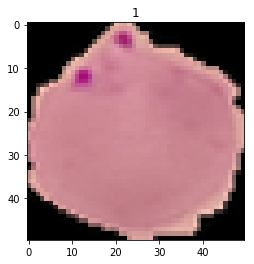

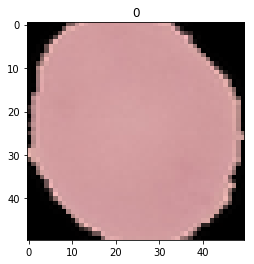

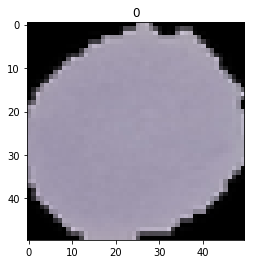

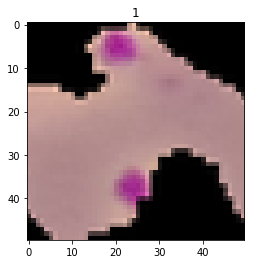

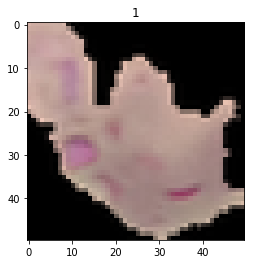

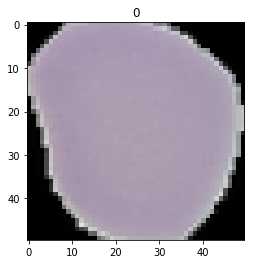

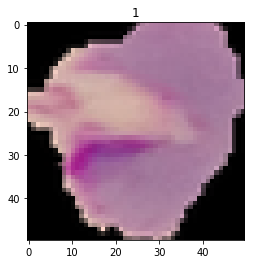

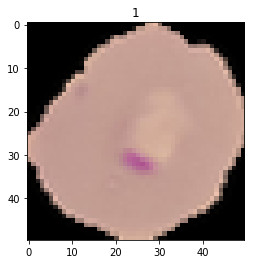

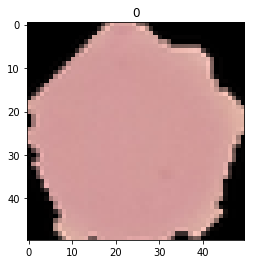

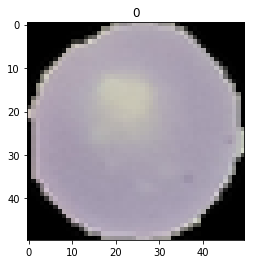

In [5]:
slide_image(imgName[:10], label[:10])

In [39]:
print

<function print>